In this assignment students will build the random forest model after 
normalizing the variable to house pricing from boston data set.

In [1]:
# Import the libraries needed

import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [2]:
# Load the boston house prices dataset. 

boston=load_boston()
bos=pd.DataFrame(boston.data)
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# Display the shape of the dataframe

bos.shape

(506, 13)

In [4]:
# Print the details of the dataset

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# Assign the feature names of the dataset to the column names of the dataframe. 

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Add Price as part of the dataframe

bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Get the statistical details of the data

print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

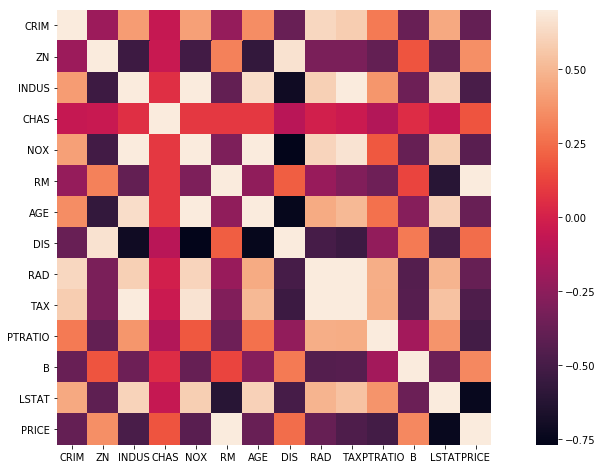

In [8]:
# Create the heat map of the variables correlation to find the most correlated variables. 

matrix = bos.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(matrix, vmax=0.7, square=True)

In [9]:
# Get the variables/features that are most correlated to the price of the house. 
# Consider the variables with more than 0.4 as the correlation value as the ones to be considered. 

variables_corr = matrix['PRICE'].sort_values(ascending=False)

variables_corr = variables_corr[abs(variables_corr) >= 0.4]
variables_corr = variables_corr[variables_corr.index != 'PRICE']
variables_corr

RM         0.695360
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

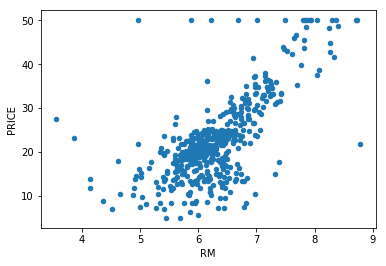

In [10]:
# The above calculations show that 'RM' is the most influencial variable in the list. 
# Display the relation between RM and PRICE.

data = pd.concat([bos['PRICE'], bos['RM']], axis=1)
data.plot.scatter(x='RM', y='PRICE')

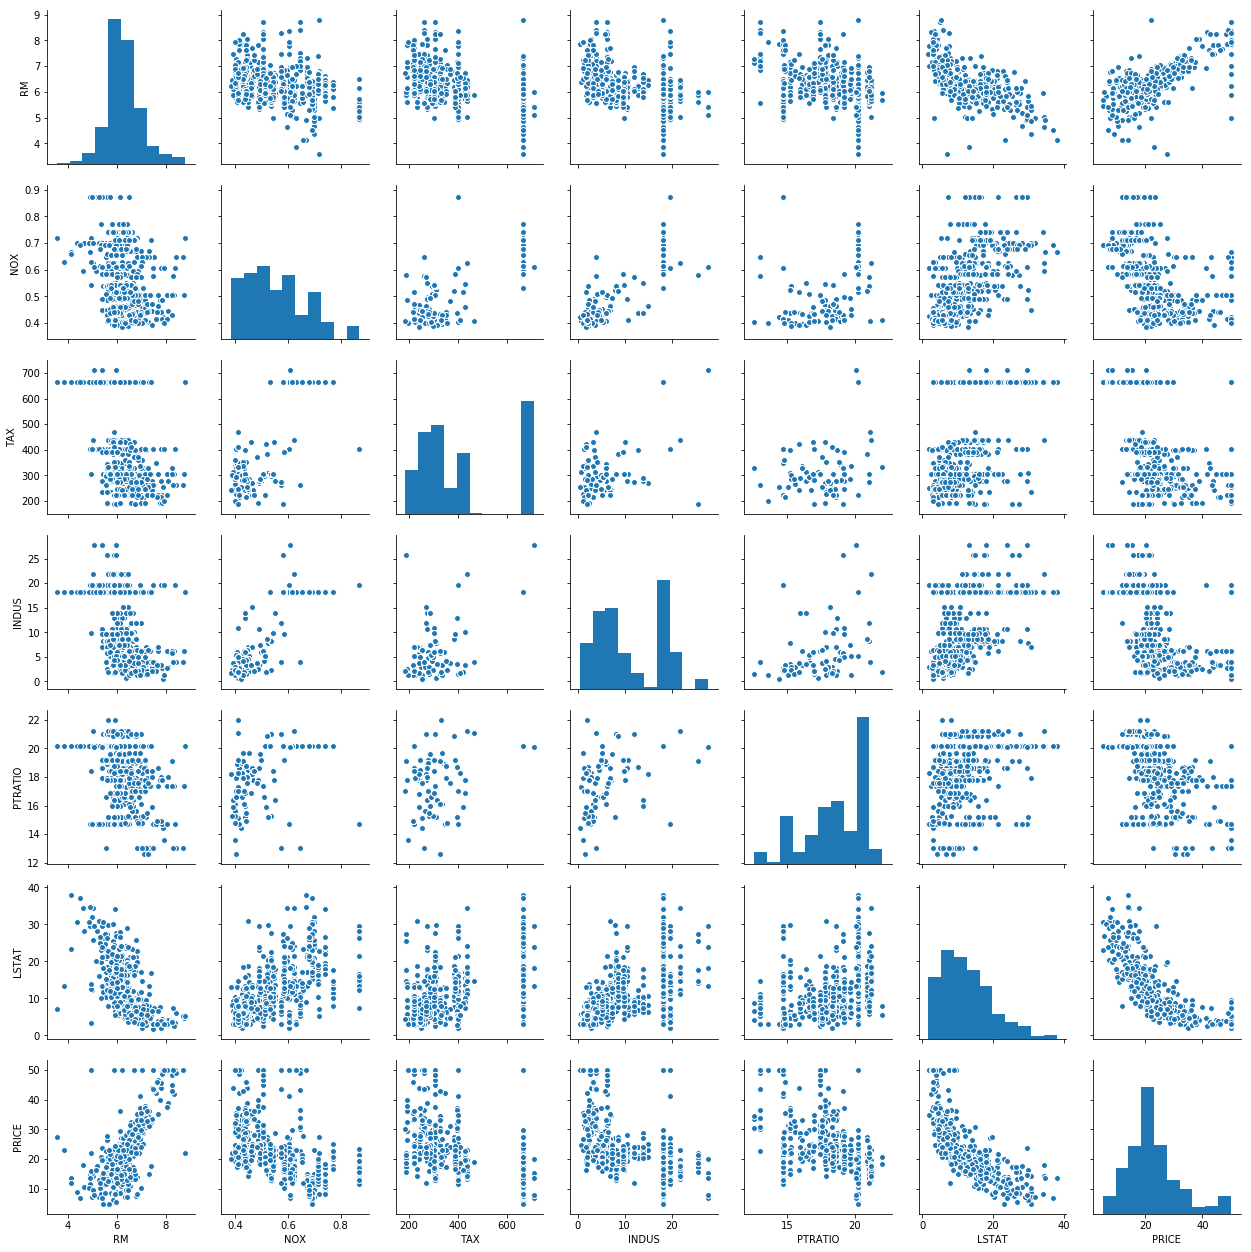

In [11]:
# Check the pairplot of the other variables with the PRICE.

cols = variables_corr.index.values.tolist() + ['PRICE']
sns.pairplot(bos[cols], size=2.5)
plt.show()

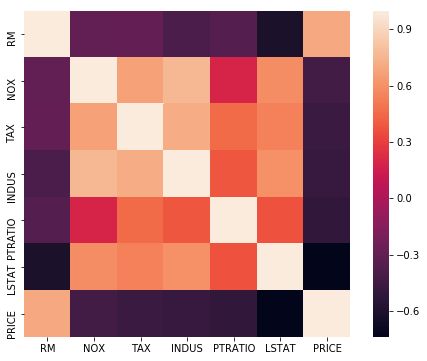

In [12]:
# Build the correlation matrix of only the influential variables 

matrix = bos[cols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=1.0, square=True)

In [13]:
# Perform the machine learning step. Divide the data into Test and Train. 
# Use Random forest Regressor model since the target data is float (continuous).

pred_vars = [v for v in variables_corr.index.values if v != 'PRICE']
target_var = 'PRICE'

X = bos[pred_vars]
y = bos[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
# Predict the value of the taget variable in the test data.

y_pred = model.predict(X_test)
print(y_pred)

[23.    30.966 15.862 22.444 14.432 20.438 19.687 14.518 22.024 21.575
 20.366 20.175  8.897 20.792 19.35  28.042 20.196  8.172 45.83  14.436
 25.505 24.034 13.977 24.198 14.118 13.911 20.749 15.04  21.115 21.572
 19.418 23.6   26.849 22.78  14.561 14.796 34.803 19.181 20.907 23.611
 17.509 29.229 45.909 18.859 23.082 15.278 15.385 24.514 17.349 27.817
 22.223]


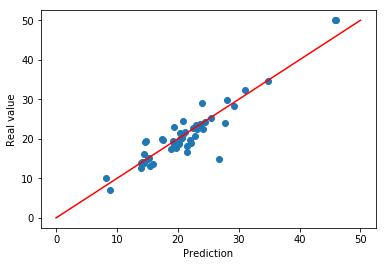

In [15]:
# Build a plot of the predicted value vs actual test target value. 
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [16]:
# Calculate the Mean Squared Log Error and Mean absolute error. 

print('MSE:\t$%.2f' % mean_absolute_error(y_test, y_pred))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred))

MSE:	$1.91
MSLE:	0.01770
